# Packages used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!conda list

# packages in environment at /Users/douglas/anaconda3/envs/jupyter_venv:
#
# Name                    Version                   Build  Channel
adjusttext                1.2.0              pyhd8ed1ab_0    conda-forge
anyio                     4.2.0           py312hecd8cb5_0  
appnope                   0.1.3           py312hecd8cb5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py312h6c40b1e_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
async-lru                 2.0.4           py312hecd8cb5_0  
attrs                     23.1.0          py312hecd8cb5_0  
babel                     2.11.0          py312hecd8cb5_0  
beautifulsoup4            4.12.3          py312hecd8cb5_0  
blas                      1.0                    openblas  
bleach                    4.1.0              pyhd3eb1b0_0  
bottleneck                1.3.7           py312h32608ca_0  
brotli                    1.0.9                h6c40b1e_8  
br

# Data
Input: nutritech_otherdata.xlsx
# Load Data 

In [4]:
# Load the entire Excel file
file_path = 'nutritech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)

# Print the sheet names to see what sheets are available
print(xls.sheet_names)

# Load a sheet into a DataFrame by sheet name
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header = 1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header = 1)



['week5_before_intervention', 'week13_after_intervention']


In [6]:
df_week5_before.columns

Index(['name', 'Age', 'Gender', 'Body weight ', 'Body height ', 'BMI ',
       'Start group', 'fasting glucose', '2hr glucose', 'fasting insulin',
       'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
       'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
       'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
       'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3',
       'IL1-AVG', 'IL6-AVG', 'IL10-AVG', 'IL8-AVG', 'MCP1-AVG', 'ICAM1-AVG'],
      dtype='object')

# Matplotlib visualisations, Boxplot & Scatterplot 

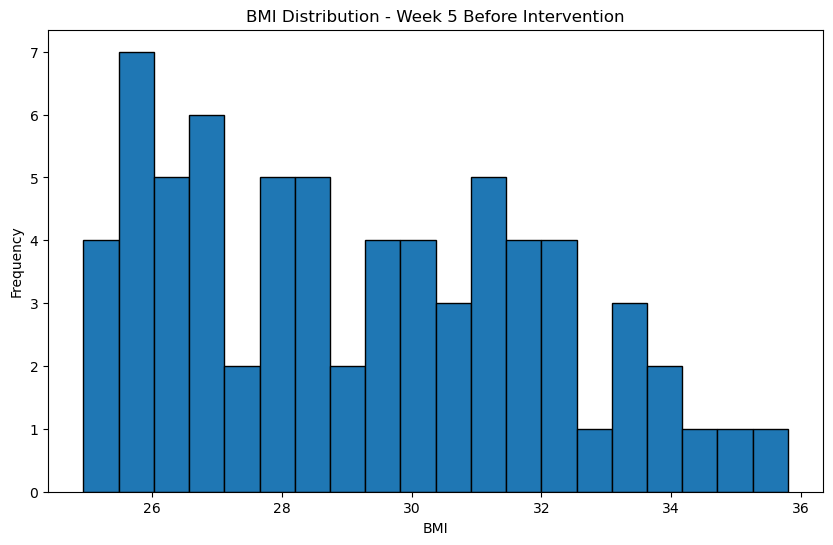

In [15]:
import matplotlib.pyplot as plt

# Plot BMI distribution
plt.figure(figsize=(10, 6))
plt.hist(df_week5_before['BMI '].dropna(), bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution - Week 5 Before Intervention')
plt.show()



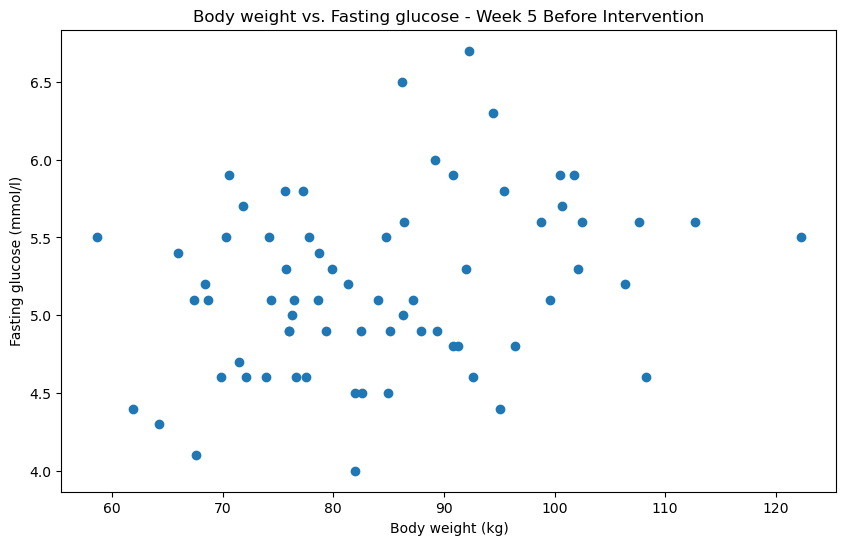

In [16]:
# Scatter plot of Body weight vs. Fasting glucose
plt.figure(figsize=(10, 6))
plt.scatter(df_week5_before['Body weight '], df_week5_before['fasting glucose'])
plt.xlabel('Body weight (kg)')
plt.ylabel('Fasting glucose (mmol/l)')
plt.title('Body weight vs. Fasting glucose - Week 5 Before Intervention')
plt.show()

# Merge Week 5+13 data for further visualisations

In [17]:
# Ensure 'name' is a column 
df_week5_before.reset_index(inplace=True)
df_week13_after.reset_index(inplace=True)

# Merge the dataframes on 'name'
merged_df = pd.merge(df_week5_before, df_week13_after, on='name', suffixes=('_week5', '_week13'))



In [18]:
merged_df.columns

Index(['index_week5', 'name', 'Age_week5', 'Gender_week5',
       'Body weight _week5', 'Body height _week5', 'BMI _week5',
       'Start group_week5', 'fasting glucose_week5', '2hr glucose_week5',
       'fasting insulin_week5', 'fasting triglyceride_week5', 'HOMA-IR_week5',
       'Matsuda_week5', 'IGI_week5', 'CRP-D1_week5', 'E-Selectin-D1_week5',
       'IL18-D1_week5', 'IL1b-D1_week5', 'TNF-alpha-D1_week5',
       'VCAM-1-D1_week5', 'adiponectin-D1_week5', 'ICAM-D2_week5',
       'ICAM1-D3_week5', 'IL1-D2_week5', 'IL1-D3_week5', 'IL10-D2_week5',
       'IL10-D3_week5', 'IL6-D2_week5', 'IL6-D3_week5', 'IL8-D2_week5',
       'IL8-D3_week5', 'MCP1-D2_week5', 'MCP1-D3_week5', 'IL1-AVG', 'IL6-AVG',
       'IL10-AVG', 'IL8-AVG', 'MCP1-AVG', 'ICAM1-AVG', 'index_week13',
       'Age_week13', 'Gender_week13', 'Body weight _week13',
       'Body height _week13', 'BMI _week13', 'Start group_week13',
       'fasting glucose_week13', '2hr glucose_week13',
       'fasting insulin_week13', 'fast

In [ ]:
# Calculate change in BMI
merged_df['BMI_change'] = merged_df['BMI _week13'] - merged_df['BMI _week5']

# Calculate change in fasting glucose
merged_df['fasting_glucose_change'] = merged_df['fasting glucose_week13'] - merged_df['fasting glucose_week5']

print(merged_df[['name', 'BMI_change', 'fasting_glucose_change']].head())


# Heatmap 

In [ ]:
# Load your data
file_path = 'nutritech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)

# Set 'name' as the index
df_week5_before.set_index('name', inplace=True)
df_week13_after.set_index('name', inplace=True)

# Calculate correlation matrix
# Select only numeric columns
numeric_df_week5_before = df_week5_before.select_dtypes(include=[float, int])
numeric_df_week13_after = df_week13_after.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix_week5 = numeric_df_week5_before.corr()
correlation_matrix_week13 = numeric_df_week13_after.corr()

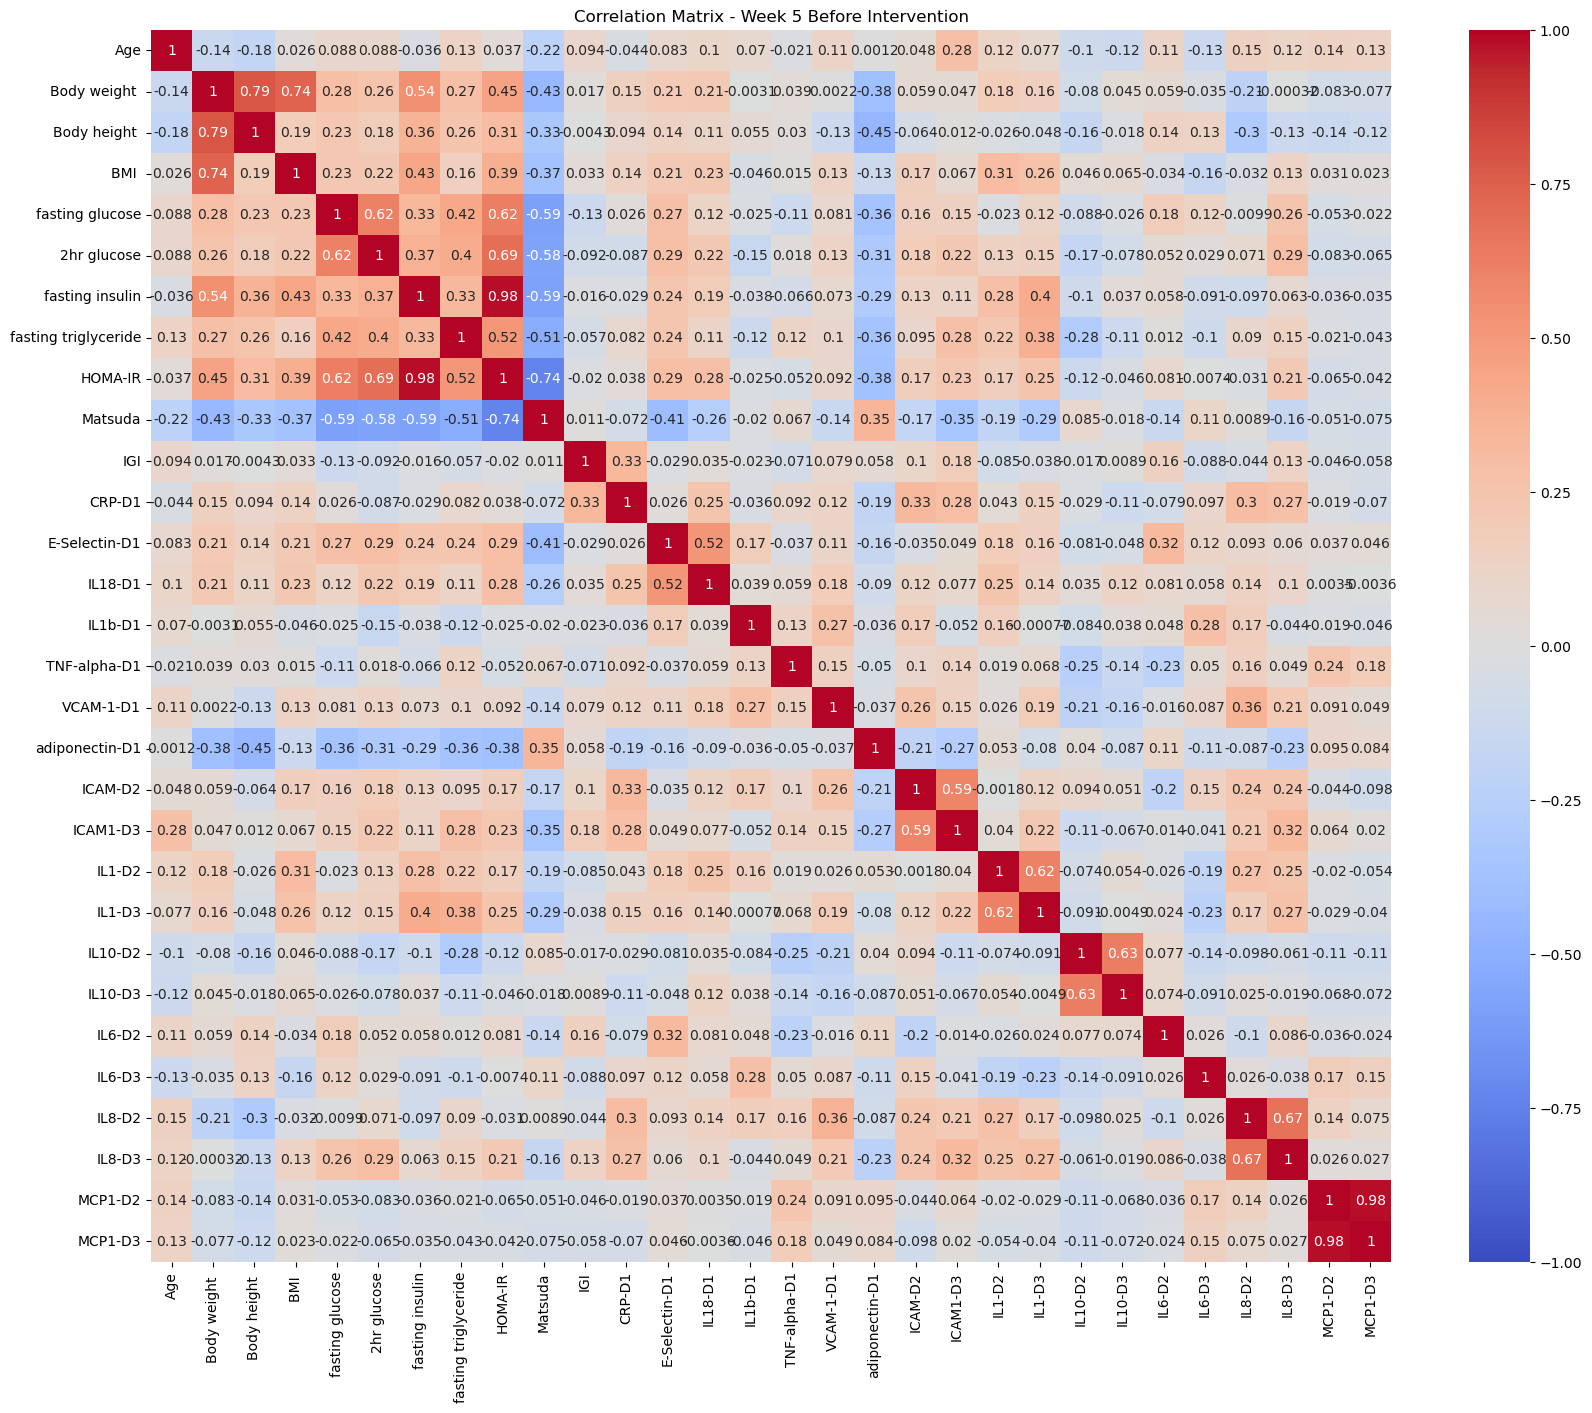

In [16]:
# Visualize the correlation matrix for Week 5 Before Intervention
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_week5, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Week 5 Before Intervention')
plt.savefig('Correlation Matrix - Week 5 Before Intervention')
plt.show()


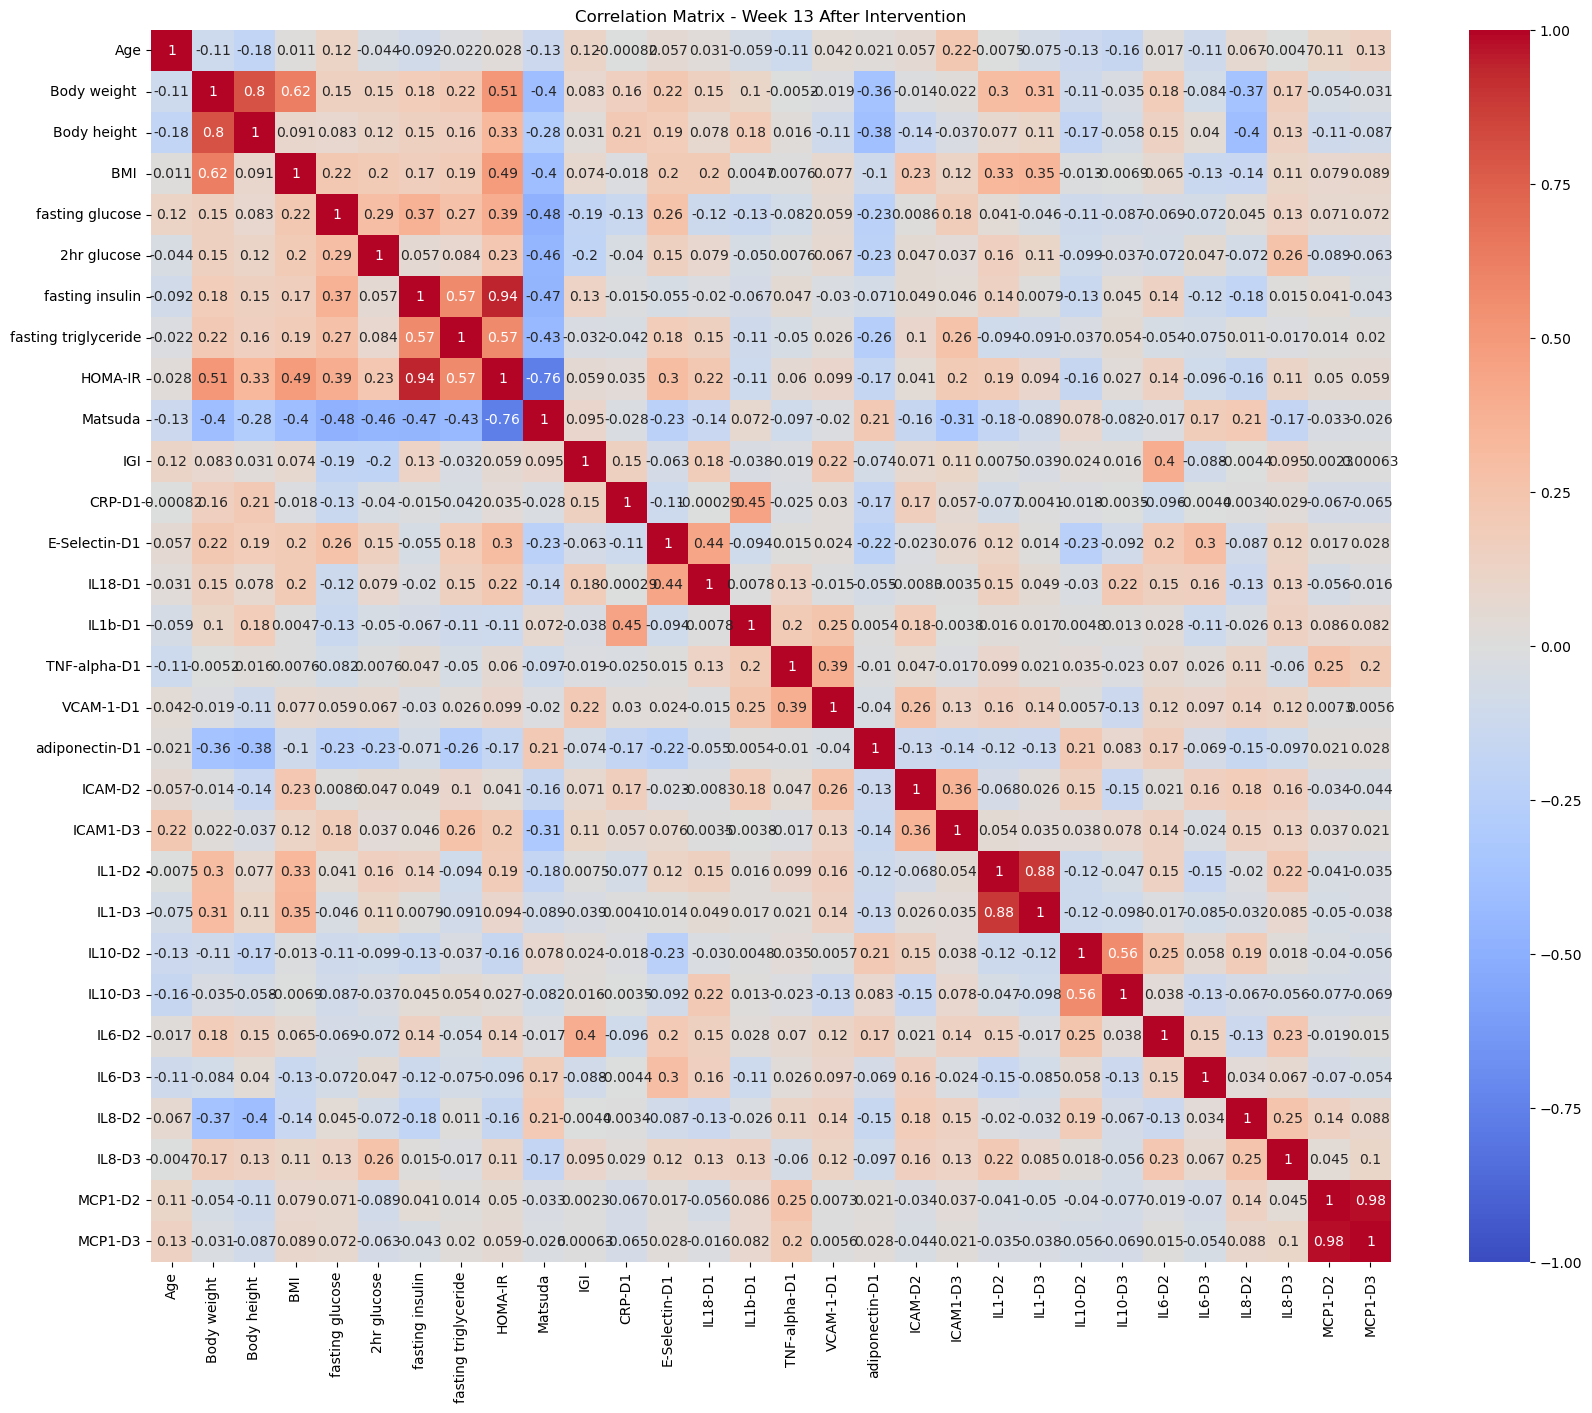

In [17]:


# Visualize the correlation matrix for Week 13 After Intervention
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_week13, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Week 13 After Intervention')
plt.savefig('Correlation Matrix - Week 13 After Intervention')
plt.show()




# Merge data, find averages for further visualisations

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the entire Excel file with correct header row
file_path = 'nutritech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)

# Load a sheet into a DataFrame by specifying the correct header row
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)




In [ ]:
# Ensure 'units' is a column (if it was an index, reset it)
df_week5_before.reset_index(inplace=True, drop=True)
df_week13_after.reset_index(inplace=True, drop=True)

# Merge the dataframes on 'units'
merged_df = pd.merge(df_week5_before, df_week13_after, on='name', suffixes=('_week5', '_week13'))

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())


# Boxplots of all relevant columns with average and delta

In [31]:
# Load your data
file_path = 'nutritech_otherdata.xlsx'
xls = pd.ExcelFile(file_path)
df_week5_before = pd.read_excel(xls, sheet_name='week5_before_intervention', header=1)
df_week13_after = pd.read_excel(xls, sheet_name='week13_after_intervention', header=1)


df_week5_before.columns

Index(['name', 'Age', 'Gender', 'Body weight ', 'Body height ', 'BMI ',
       'Start group', 'fasting glucose', '2hr glucose', 'fasting insulin',
       'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
       'E-Selectin-D1', 'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
       'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
       'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3',
       'IL1-AVG', 'IL6-AVG', 'IL10-AVG', 'IL8-AVG', 'MCP1-AVG', 'ICAM1-AVG'],
      dtype='object')

In [ ]:
import pandas as pd

# List of columns to compare
columns_to_compare = ['Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                        'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                      'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                      'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3','IL1-AVG', 'IL6-AVG', 'IL10-AVG', 'IL8-AVG', 'MCP1-AVG', 'ICAM1-AVG']

# Add a 'Time' column to each DataFrame
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'

# Combine the two dataframes
combined_df = pd.concat([df_week5_before, df_week13_after])

# Create an empty list to store the table data
table_data = []

# Loop through each column, calculate averages and deltas
for column in columns_to_compare:
    
    # Data for Week 5
    data_week5 = combined_df[combined_df['Time'] == 'Week 5'][column].dropna()
    
    # Data for Week 13
    data_week13 = combined_df[combined_df['Time'] == 'Week 13'][column].dropna()
    
    # Calculate averages
    avg_week5 = data_week5.mean()
    avg_week13 = data_week13.mean()
    
    # Calculate delta and percentage delta
    delta = avg_week13 - avg_week5
    percentage_delta = (delta / avg_week5) * 100
    
    # Append the results for the current column to the table data
    table_data.append([column.strip(), avg_week5, avg_week13, delta, percentage_delta])

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data, columns=['Health Marker', 'Average Week 5', 'Week 13', 'Delta', 'Percentage Delta (%)'])

# Display the table

In [33]:
table_df

,Health Marker,Average Week 5,Average Week 13,Delta,Percentage Delta (%)
0,Body weight,84.192754,85.613043,1.420290,1.686950
1,Body height,1.691899,1.691899,0.000000,0.000000
2,BMI,29.193152,28.145687,-1.047466,-3.588052
3,fasting glucose,5.182609,5.055072,-0.127536,-2.460850
4,2hr glucose,6.126087,5.791304,-0.334783,-5.464869
5,fasting insulin,16.894782,16.379832,-0.514950,-3.047982
6,fasting triglyceride,1.279107,1.189265,-0.089843,-7.023853
7,HOMA-IR,3.731472,3.343269,-0.388202,-10.403468
8,Matsuda,57.860125,66.139455,8.279330,14.309216
9,IGI,25.095291,27.096592,2.001300,7.974804


In [38]:
# Save results
table_df.to_csv('health_marker_averages_and_SD.csv', index=False)

In [43]:
import pandas as pd

# List of columns to compare
columns_to_compare = ['Body weight ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                     'IL18-D1','MCP1-AVG', 'ICAM1-AVG']

# Add a 'Time' column to each DataFrame
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'

# Combine the two dataframes
combined_df = pd.concat([df_week5_before, df_week13_after])

# Create an empty list to store the table data
table_data = []

# Loop through each column, calculate averages and deltas
for column in columns_to_compare:
    
    # Data for Week 5
    data_week5 = combined_df[combined_df['Time'] == 'Week 5'][column].dropna()
    
    # Data for Week 13, split into start groups
    data_week13_group_A = combined_df[(combined_df['Time'] == 'Week 13') & (combined_df['Start group'] == 'A=CR=CaloricRestrict=Weight loss')][column].dropna()
    data_week13_group_B = combined_df[(combined_df['Time'] == 'Week 13') & (combined_df['Start group'] == 'B=ctrl=Weight maintenance')][column].dropna()
    
    # Calculate means and standard deviations
    avg_week5 = data_week5.mean()
    std_week5 = data_week5.std()
    
    avg_week13_A = data_week13_group_A.mean()
    std_week13_A = data_week13_group_A.std()
    
    avg_week13_B = data_week13_group_B.mean()
    std_week13_B = data_week13_group_B.std()
    
    # Append the results for the current column to the table data
    table_data.append([
        column.strip(), 
        f'{avg_week5:.2f} ± {std_week5:.2f}',
        f'{avg_week13_A:.2f} ± {std_week13_A:.2f}',
        f'{avg_week13_B:.2f} ± {std_week13_B:.2f}'
    ])

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data, columns=['Health Marker', 'Week 5 Mean', 'Week 13 Group A Mean', 'Week 13 Group B Mean'])

# Display the table
#import ace_tools as tools; tools.display_dataframe_to_user(name="Averages and Standard Deviations Table", dataframe=table_df)
table_df

,Health Marker,Week 5 Mean,Week 13 Group A Mean,Week 13 Group B Mean
0,Body weight,84.19 ± 13.15,85.59 ± 13.14,85.64 ± 13.87
1,BMI,29.19 ± 2.83,27.37 ± 2.98,29.16 ± 2.57
2,fasting glucose,5.18 ± 0.56,5.05 ± 0.56,5.06 ± 0.51
3,2hr glucose,6.13 ± 2.30,5.38 ± 1.95,6.32 ± 2.34
4,fasting insulin,16.89 ± 11.15,16.28 ± 21.27,16.51 ± 5.39
5,fasting triglyceride,1.28 ± 0.49,1.08 ± 0.58,1.33 ± 0.62
6,HOMA-IR,3.73 ± 1.94,2.99 ± 1.55,3.80 ± 1.34
7,Matsuda,57.86 ± 30.41,71.24 ± 37.04,57.31 ± 25.58
8,IGI,25.10 ± 20.02,22.97 ± 20.08,32.32 ± 51.72
9,CRP-D1,783.18 ± 1172.62,1153.71 ± 2683.62,567.44 ± 595.52


In [57]:
import pandas as pd
from scipy.stats import ttest_ind

# List of columns to compare
columns_to_compare = ['Body weight ', 'Body height ', 'BMI ', 'fasting glucose', '2hr glucose',
                      'fasting insulin', 'fasting triglyceride', 'HOMA-IR', 'Matsuda', 'IGI', 'CRP-D1',
                      'E-Selectin-D1',  'IL18-D1', 'IL1b-D1', 'TNF-alpha-D1', 'VCAM-1-D1',
                      'adiponectin-D1', 'ICAM-D2', 'ICAM1-D3', 'IL1-D2', 'IL1-D3', 'IL10-D2',
                      'IL10-D3', 'IL6-D2', 'IL6-D3', 'IL8-D2', 'IL8-D3', 'MCP1-D2', 'MCP1-D3','IL1-AVG', 'IL6-AVG', 'IL10-AVG', 'IL8-AVG', 'MCP1-AVG', 'ICAM1-AVG']

# Add a 'Time' column to each DataFrame
df_week5_before['Time'] = 'Week 5'
df_week13_after['Time'] = 'Week 13'

# Combine the two dataframes
combined_df = pd.concat([df_week5_before, df_week13_after])

# Create an empty list to store the table data
table_data = []

# Loop through each column, calculate averages, SDs, and p-values
for column in columns_to_compare:
    
    # Data for Week 5
    data_week5 = combined_df[combined_df['Time'] == 'Week 5'][column].dropna()
    
    # Data for Week 13, split into start groups
    data_week13_group_A = combined_df[(combined_df['Time'] == 'Week 13') & (combined_df['Start group'] == 'A=CR=CaloricRestrict=Weight loss')][column].dropna()
    data_week13_group_B = combined_df[(combined_df['Time'] == 'Week 13') & (combined_df['Start group'] == 'B=ctrl=Weight maintenance')][column].dropna()
    
    # Calculate means and standard deviations
    avg_week5 = data_week5.mean()
    std_week5 = data_week5.std()
    
    avg_week13_A = data_week13_group_A.mean()
    std_week13_A = data_week13_group_A.std()
    
    avg_week13_B = data_week13_group_B.mean()
    std_week13_B = data_week13_group_B.std()
    
    # Calculate p-values using independent t-test (assuming unpaired data)
    _, p_value_a = ttest_ind(data_week5, data_week13_group_A, equal_var=False, nan_policy='omit')
    _, p_value_b = ttest_ind(data_week5, data_week13_group_B, equal_var=False, nan_policy='omit')
    
    # Append the results for the current column to the table data
    table_data.append([
        column.strip(), 
        f'{avg_week5:.2f} ± {std_week5:.2f}',
        f'{avg_week13_A:.2f} ± {std_week13_A:.2f}',
        f'{avg_week13_B:.2f} ± {std_week13_B:.2f}',
        f'{p_value_a:.2f}',  # Scientific notation for p-value
        f'{p_value_b:.2f}'   # Scientific notation for p-value
    ])

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data, columns=[
    'Health Marker', 
    'Average Week 5', 
    'Average Week 13 Group A', 
    'Average Week 13 Group B',
    'p-value (Week 5 vs Group A)',
    'p-value (Week 5 vs Group B)'
])

# Display the table
#import ace_tools as tools; tools.display_dataframe_to_user(name="Averages, Standard Deviations, and


In [58]:
table_df
#table_df.to_csv('pval_filtered_health_marker_averages_and_SD.csv', index=False)

,Health Marker,Average Week 5,Average Week 13 Group A,Average Week 13 Group B,p-value (Week 5 vs Group A),p-value (Week 5 vs Group B)
0,Body weight,84.19 ± 13.15,85.59 ± 13.14,85.64 ± 13.87,0.60,0.63
1,Body height,1.69 ± 0.09,1.69 ± 0.09,1.69 ± 0.09,0.92,0.91
2,BMI,29.19 ± 2.83,27.37 ± 2.98,29.16 ± 2.57,0.00,0.95
3,fasting glucose,5.18 ± 0.56,5.05 ± 0.56,5.06 ± 0.51,0.25,0.27
4,2hr glucose,6.13 ± 2.30,5.38 ± 1.95,6.32 ± 2.34,0.08,0.70
5,fasting insulin,16.89 ± 11.15,16.28 ± 21.27,16.51 ± 5.39,0.87,0.82
6,fasting triglyceride,1.28 ± 0.49,1.08 ± 0.58,1.33 ± 0.62,0.07,0.69
7,HOMA-IR,3.73 ± 1.94,2.99 ± 1.55,3.80 ± 1.34,0.04,0.83
8,Matsuda,57.86 ± 30.41,71.24 ± 37.04,57.31 ± 25.58,0.06,0.93
9,IGI,25.10 ± 20.02,22.97 ± 20.08,32.32 ± 51.72,0.60,0.46


In [ ]:
table_df

In [28]:
# Save the DataFrame as a CSV file on your local machine
table_df.to_csv('health_marker_averages_and_deltas.csv', index=False)
